In [1]:
import pandas as pd
import pyfolio
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

C:\Users\Roberto Ruiz\.conda\envs\rl_final_proj\lib\site-packages\pyfolio\pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [2]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    print('Sharpe: ',(252**0.5)*df['daily_return'].mean()/ df['daily_return'].std())
    return df

In [3]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

In [4]:
def get_account_value_ppo(model_name):
    df_account_value=pd.DataFrame()
    for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
        temp = pd.read_csv('results/secondRun_RR/account_value_trade_{}_{}.csv'.format(model_name,i))
        df_account_value = df_account_value.append(temp,ignore_index=True)
    df_account_value = pd.DataFrame({'account_value':df_account_value['0']})
    sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
    print(sharpe)
    df_account_value=df_account_value.join(df_trade_date[63:].reset_index(drop=True))
    return df_account_value

In [7]:
def get_account_value_ptr_ppo(model_name_1, model_name_2):
    df_account_value=pd.DataFrame()
    for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
        temp = pd.read_csv('results/ptr_ppo_first_run/account_value_trade_{}_{}_{}.csv'.format(model_name_1, model_name_2, i))
        df_account_value = df_account_value.append(temp,ignore_index=True)
    df_account_value = pd.DataFrame({'account_value':df_account_value['0']})
    sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
    print(sharpe)
    df_account_value=df_account_value.join(df_trade_date[63:].reset_index(drop=True))
    return df_account_value

In [8]:
df=pd.read_csv('data/dow_30_2009_2020.csv')
rebalance_window = 63
validation_window = 63
unique_trade_date = df[(df.datadate > 20151001)&(df.datadate <= 20200707)].datadate.unique()
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

In [10]:
ppo_acct_val = get_account_value_ppo('PPO')
ptr_ppo_acct_val = get_account_value_ptr_ppo('PTR','PPO')

1.618489736489298
0.9196753935920309


In [11]:
ppo_acct_val = get_daily_return(ppo_acct_val)
ptr_ppo_acct_val = get_daily_return(ptr_ppo_acct_val)


Sharpe:  1.618489736489298
Sharpe:  0.9196753935920309


In [17]:
dji = pd.read_csv("data/^DJI.csv")
test_dji=dji[(dji['Date']>='2016-01-01') & (dji['Date']<='2020-06-30')]
test_dji = test_dji.reset_index(drop=True)

In [18]:
test_dji['daily_return']=test_dji['Adj Close'].pct_change(1)

In [19]:
dow_strat = backtest_strat(test_dji)

In [20]:
ppo_acct_val['Date'] = test_dji['Date']
ptr_ppo_acct_val['Date'] = test_dji['Date']

In [21]:
ppo_acct_val.head()

,account_value,datadate,daily_return,Date
0,1000000.000000,20160104,NaN,2016-01-04
1,999868.828720,20160105,-0.000131,2016-01-05
2,997917.893535,20160106,-0.001951,2016-01-06
3,994415.057058,20160107,-0.003510,2016-01-07
4,991725.325671,20160108,-0.002705,2016-01-08


In [22]:
ptr_ppo_acct_val.head()

,account_value,datadate,daily_return,Date
0,1000000.000000,20160104,NaN,2016-01-04
1,999705.151026,20160105,-0.000295,2016-01-05
2,996882.875146,20160106,-0.002823,2016-01-06
3,991255.522686,20160107,-0.005645,2016-01-07
4,988637.225252,20160108,-0.002641,2016-01-08


In [23]:
ppo_strat = backtest_strat(ppo_acct_val[0:1097])
ptr_ppo_strat = backtest_strat(ptr_ppo_acct_val[0:1097])

In [24]:
# ppo_acct_val.to_csv('results/processed_results/df_account_value_ppo_daily_return.csv',index=False)
# ptr_ppo_acct_val.to_csv('results/processed_results/df_account_value_ptr_ppo_daily_return.csv',index=False)

In [30]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = ppo_strat,
                                   benchmark_rets=dow_strat, set_context=False)

Start date,2016-01-04
End date,2020-05-12
Total months,52
,Backtest
Annual return,12.5%
Cumulative returns,66.7%
Annual volatility,7.3%
Sharpe ratio,1.64
Calmar ratio,2.21
Stability,0.84
Max drawdown,-5.6%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

In [31]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = ptr_ppo_strat,
                                   benchmark_rets=dow_strat, set_context=False)

Start date,2016-01-04
End date,2020-05-12
Total months,52
,Backtest
Annual return,6.6%
Cumulative returns,32.2%
Annual volatility,7.2%
Sharpe ratio,0.93
Calmar ratio,0.79
Stability,0.69
Max drawdown,-8.4%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

In [27]:

ppo_cum_ret = pyfolio.timeseries.cum_returns(ppo_strat)
ptr_ppo_cum_ret = pyfolio.timeseries.cum_returns(ptr_ppo_strat)
dow_cum_ret = pyfolio.timeseries.cum_returns(dow_strat)

C:\Users\Roberto Ruiz\.conda\envs\rl_final_proj\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  """Entry point for launching an IPython kernel.
C:\Users\Roberto Ruiz\.conda\envs\rl_final_proj\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  
C:\Users\Roberto Ruiz\.conda\envs\rl_final_proj\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:

ppo_cum_ret.name = "PPO"
ptr_ppo_cum_ret.name = "PTR PPO"
dow_cum_ret.name = "DJIA"
df_cum_ret = pd.concat([ppo_cum_ret, ptr_ppo_cum_ret, dow_cum_ret], axis = 1)

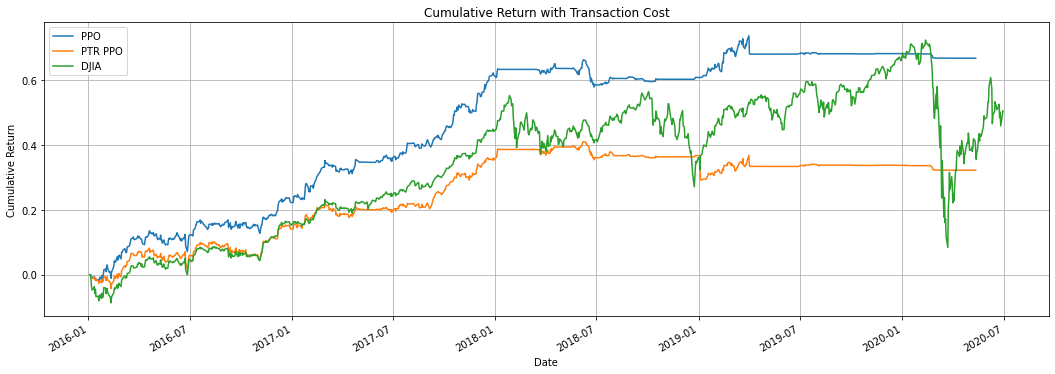

In [29]:
df_cum_ret.plot(figsize = (18, 6), title = "Cumulative Return with Transaction Cost", grid = True)
matplotlib.pyplot.ylabel("Cumulative Return")
matplotlib.pyplot.show()